# Assignment 1 - Rhythm Generator
### Mariella Daghfal, Kaede Johnson, Shayan Khajehnouri, & Tahel Singer

In [123]:
# to be safe i personally created venv with anaconda terminal.
# conda create -n "digital_musicology" python=3.8
# conda activate digital_musicology
# conda install pip

In [124]:
## Dependencies
# pip install music21
# pip install tqdm
# pip install pandas
# pip install scipy
# pip install ms3
from music21 import *
from music21 import note
from tqdm import *
import pandas as pd
import numpy as np
import collections
import pickle
import math

## for viewing score, download and install finale note pad at https://store.makemusic.com/Downloads/Default.aspx?id=538&_ga=2.3616692.58482559.1678537005-1850486829.1678537005 and then run:
# configure.run()

## I don't know if it's because I screwed up something during initial setup but this is what I had to do to get music showing:
# environment.set('musescoreDirectPNGPath', 'C:\\Program Files (x86)\\Finale NotePad 2012\\Finale NotePad.exe')

In [125]:
## Bach score from package

s = corpus.parse('bach/bwv65.2.xml')

# Print music12 object to show it worked
# s.show('text')

# image version (ideally this is inline but i can't get that working; for me it pulls open finale note pad with the sheet music in a separate window)
# s.show()

In [126]:
## Load scores into corpus
# Be sure to modify folder path below
# Excludes scores that aren't strictly 3/4 meter all the way through (only 15 / 600)

import os
slangpolska_scores = {}
excluded = 0
# CHANGE FOLDER BELOW TO LOCATION OF XML FILES. Download xml folders from https://github.com/DCMLab/music-generation-challenge-2021/tree/main/data
xml_file_location = 'C:/Users/HP/anaconda3/envs/digital_musicology/xml/'
scores_xml = os.listdir(xml_file_location)
for si in trange(len(scores_xml)):
    if scores_xml[si] != 'conversion.log':
        tmp = converter.parse(xml_file_location + scores_xml[si])
        tmp_meters = tmp.recurse().getElementsByClass(meter.TimeSignature)
        if len(tmp_meters) != 1 or tmp_meters[0].ratioString != '3/4':
            print('excluding ' + scores_xml[si] + '. ' + str(len(tmp_meters)) + ' meter(s), first is ' + tmp_meters[0].ratioString)
            excluded += 1
        elif tmp.recurse().notesAndRests[-1].measureNumber < 8:
            print('excluding ' + scores_xml[si] + '. Only ' + str(tmp.recurse().notesAndRests[-1].measureNumber) + ' measures.')
            excluded += 1
        else:
            slangpolska_scores[scores_xml[si]] = tmp

print('Imported ' + str(len(slangpolska_scores)) + ' scores into corpus. Excluded ' + str(excluded) + ' due to inconsistent meter, polyphonic, or not enough measures.')

# pkl causing trouble with dictionary save... for now, just keep corpus in memory
#with open('slangpolska.pickle', 'wb') as f:
#    pickle.dump(slangpolska_scores, f, protocol=pickle.HIGHEST_PROTOCOL)

  2%|▏         | 13/600 [00:00<00:04, 128.65it/s]

excluding 1b651a94a8f8680da3cef1e60705194d.xml. Only 4 measures.
excluding 32a7f688d6c7ffc643473e7067ab5945.xml. Only 1 measures.
excluding 60ae81952628613e03d563b0dae8bbc2.xml. Only 2 measures.
excluding 6a7d307d1f0712090e4043a6b4637efa.xml. Only 3 measures.
excluding 8c6965e3c831e8cb769e578423c12d1e.xml. Only 4 measures.
excluding a0e1af6a94ac4663c193e7d6d9818189.xml. Only 3 measures.


  6%|▌         | 37/600 [00:00<00:06, 93.79it/s] 

excluding Ninas_slängpolska_20240b.xml. 2 meter(s), first is 3/4


 25%|██▌       | 150/600 [00:02<00:05, 83.70it/s]

excluding Poloness_ur_Andreas_Hööks_notbok_cae293.xml. 4 meter(s), first is 2/2
excluding Polonoise_92b598.xml. 2 meter(s), first is 3/4
excluding Polonoise_No_30_ur_Stakels_notsamling_90c44f.xml. Only 6 measures.


 36%|███▌      | 215/600 [00:03<00:04, 79.21it/s]

excluding Polonäs_efter_Gustaf_Weslien_2981d4.xml. Only 6 measures.


 48%|████▊     | 288/600 [00:04<00:05, 57.27it/s]

excluding Polonäs_i_Dm_efter_Daniel_Danielsson_ac3754.xml. 2 meter(s), first is 3/4


 55%|█████▍    | 327/600 [00:04<00:03, 80.40it/s]

excluding Polonäs_sexdregasamlingen_del_3_nr_1_d8c3dc.xml. 2 meter(s), first is 3/4


 66%|██████▌   | 394/600 [00:06<00:03, 62.92it/s]

excluding Polska_efter_Wesslén_bec4ac.xml. 2 meter(s), first is 3/4
excluding Polska_efter_Wesslén_ce0449.xml. 2 meter(s), first is 3/4
excluding Polska_efter_Wesslén_fc5278.xml. 2 meter(s), first is 3/4
excluding Polska_från_Västergötland_4b64d8.xml. 3 meter(s), first is 3/4


 72%|███████▏  | 434/600 [00:06<00:02, 82.22it/s]

excluding Sydjämtsk_slängpolska_efter_JohnErik_Mattsson_2a0874.xml. 2 meter(s), first is 3/4


 82%|████████▏ | 489/600 [00:08<00:02, 43.27it/s]

excluding _Polonäs_sexdregasamlingen_del_1_nr_36_dfc2c9.xml. 2 meter(s), first is 3/4
excluding _Polonäs_sexdregasamlingen_del_1_nr_36_ed2b21.xml. 2 meter(s), first is 3/4


 95%|█████████▍| 569/600 [00:08<00:00, 83.63it/s]

excluding _Polska_efter_Gustav_Strutz_21bb05.xml. 5 meter(s), first is 3/4
excluding _Polska_efter_Gustav_Strutz_5b7324.xml. 5 meter(s), first is 3/4


100%|██████████| 600/600 [00:09<00:00, 65.32it/s]

excluding _Polska_Kringellåt_efter_Snickar_Erik_985b63.xml. 3 meter(s), first is 4/4
Imported 576 scores into corpus. Excluded 23 due to inconsistent meter, polyphonic, or not enough measures.


In [127]:
# Investigate one score to get familiar with music21
sample_score = slangpolska_scores['_1814_698087.xml']
print('music21 object for imported score is called ' + str(type(sample_score)))
#print('sample score key is ' + str(sample_score.analyze('key')))
print('The first time signature object is ' + sample_score.recurse().getElementsByClass(meter.TimeSignature)[0].ratioString)
print('There is (are) ' + str(len(sample_score.recurse().getElementsByClass(meter.TimeSignature))) + ' time signature object(s)')
print('Measure 6 does not have a time signature object: ' + str(sample_score.measure(6).timeSignature is None))
print('Recall the sample score is in time ' + sample_score.recurse().getElementsByClass(meter.TimeSignature)[0].ratioString)
curr_measure = 0
for i in sample_score.recurse().notes:
    if i.measureNumber != curr_measure:
        curr_measure = i.measureNumber
        print("Measure " + str(curr_measure))
    print('Beat: ' + str(i.beat) + ', Duration: ' + str(i.duration.quarterLength) + ', Pitch: ' + str(i.name) + ', Accents: ' + str(i.articulations))
print('Music21 object print:')
sample_score.show('text')

music21 object for imported score is called <class 'music21.stream.base.Score'>
The first time signature object is 3/4
There is (are) 1 time signature object(s)
Measure 6 does not have a time signature object: True
Recall the sample score is in time 3/4
Measure 1
Beat: 1.0, Duration: 0.5, Pitch: D, Accents: []
Beat: 1.5, Duration: 0.5, Pitch: C, Accents: []
Beat: 2.0, Duration: 1.0, Pitch: B, Accents: []
Beat: 3.0, Duration: 1.0, Pitch: G, Accents: []
Measure 2
Beat: 1.0, Duration: 0.5, Pitch: C, Accents: []
Beat: 1.5, Duration: 0.5, Pitch: B, Accents: []
Beat: 2.0, Duration: 1.0, Pitch: A, Accents: []
Beat: 3.0, Duration: 1.0, Pitch: D, Accents: []
Measure 3
Beat: 1.0, Duration: 0.75, Pitch: G, Accents: []
Beat: 1.75, Duration: 0.25, Pitch: F#, Accents: []
Beat: 2.0, Duration: 0.5, Pitch: G, Accents: []
Beat: 2.5, Duration: 0.5, Pitch: A, Accents: []
Beat: 3.0, Duration: 0.5, Pitch: B, Accents: []
Beat: 3.5, Duration: 0.5, Pitch: C, Accents: []
Measure 4
Beat: 1.0, Duration: 0.5, Pitc

In [128]:
from collections import Counter
total_note_count = 0
total_accents = 0
total_scores_w_accents = 0
articulations = []
for i, score in enumerate(slangpolska_scores):
    fresh_score = 1
    for note in slangpolska_scores[score].recurse().notesAndRests:
        total_note_count += 1
        if len(note.articulations) > 0:
            total_accents += len(note.articulations)
            articulations.append(note.articulations)
            if fresh_score == 1:
                total_scores_w_accents += 1
                fresh_score = 0
flat_articulations = [artic.name for sublist in articulations for artic in sublist]
accent_shares = collections.Counter(flat_articulations).most_common(10)
for i in range(len(accent_shares)):
    accent_shares[i] = (accent_shares[i][0], accent_shares[i][1] / total_note_count)
print("Shares of scores with accents")
print(total_scores_w_accents / len(slangpolska_scores.keys()))
print("Share of notes with certain accent type")
print(accent_shares)
print("Share of all notes with some type of accent")
overall_accent_share = 0
for item in accent_shares:
    overall_accent_share += item[1]
print(overall_accent_share)

Shares of scores with accents
0.08333333333333333
Share of notes with certain accent type
[('staccato', 0.009103956161841667), ('down bow', 0.00046389585538046706), ('tenuto', 0.0004493991098998275), ('staccatissimo', 0.0003624186370159899), ('up bow', 0.00023194792769023353), ('accent', 0.00020295443672895436), ('open string', 0.00010147721836447718), ('stopped', 7.248372740319798e-05)]
Share of all notes with some type of accent
0.010988533074324814


In [129]:
# Tokenization
# Starting simple until we define rhythm. Tokens will simply be location of beat in measure (that is, first element in Beat: , Duration: , Pitch: printout sequence above)
# First, observe where beats can occur (also sneakily multiply beat timings by 12 because see output + explanation in next cell)
import collections
all_beats = []
for score in slangpolska_scores:
    if (slangpolska_scores[score].recurse().notes[-1].measureNumber >= 4): # and (slangpolska_scores[score].recurse().notes[0].beat == 1):
        for note in slangpolska_scores[score].recurse().notesAndRests:
            all_beats.append(float(note.beat) + (3 * (note.measureNumber-1)))
note_placements = collections.Counter(all_beats).most_common(100)
location = []
frequency = []
for i,tuple in enumerate(note_placements):
    try:
        if np.isnan(float((tuple[0]))) == False:
            location.append(float((tuple[0])))
            frequency.append(tuple[1])
    except:
        print(tuple[0])

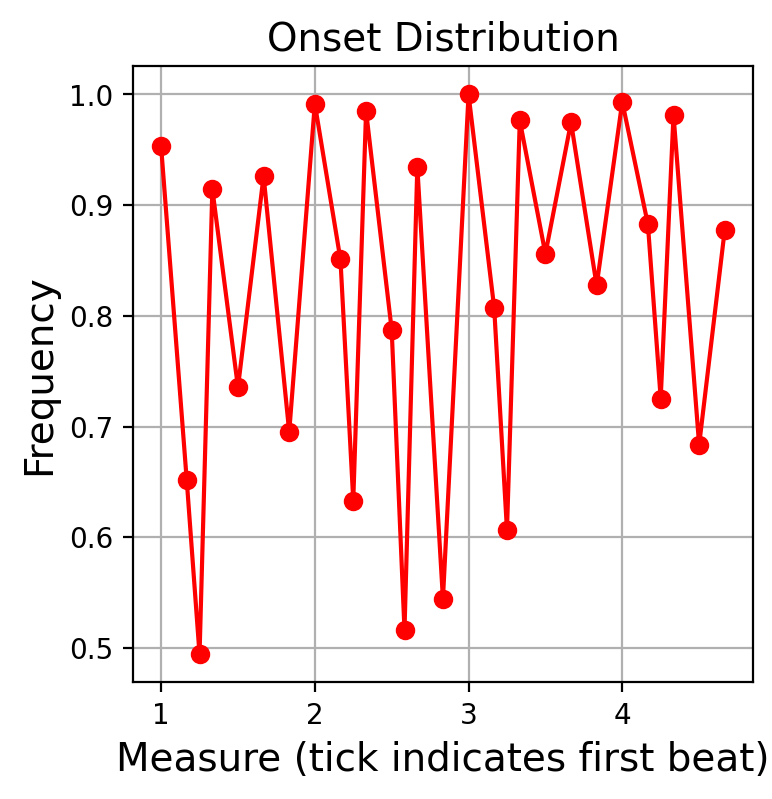

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
max_frequency = max(frequency)
onset_distribution = pd.DataFrame(list(zip(location, frequency)),
               columns =['atomic_moment', 'frequency'])
onset_distribution['frequency'] = onset_distribution['frequency'] / max_frequency
onset_distribution = onset_distribution.sort_values(by='atomic_moment')
onset_distribution = onset_distribution[onset_distribution['atomic_moment'] <= 12]
plt.plot(onset_distribution['atomic_moment'], onset_distribution['frequency'], color='red', marker='o')
plt.title('Onset Distribution', fontsize=14)
plt.xlabel('Measure (tick indicates first beat)', fontsize=14)
plt.xticks([1, 4, 7, 10], ['1','2','3','4'])
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [131]:
# In graph above, a very rough overall metrical strength can be inferred:
# Considering the 

Distance Formula

In [ ]:
import music21
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import random

def chronotonic_comparison(stream_base_score_1, stream_base_score_2, subset_start = -1, show_graphs = False):
    final_measure_1 = stream_base_score_1.recurse().notesAndRests[-1].measureNumber
    final_measure_2 = stream_base_score_2.recurse().notesAndRests[-1].measureNumber
    final_measure_for_subset = final_measure_1
    if final_measure_2 < final_measure_for_subset:
        final_measure_for_subset = final_measure_2
    if (final_measure_for_subset < 8) or (final_measure_for_subset < (subset_start + 7)):
        print("ONE OF THE SCORES IS TOO SHORT")
        return "ONE OF THE SCORES IS TOO SHORT"
    if subset_start == -1:
        while True:
            subset_start = random.randint(1, (final_measure_for_subset - 8)+1)
            if subset_start%2 != 0:
                break
    else:
        # subset start passed in
        pass
    chrono1, xvals1, yvals1, xticks1, xlabs1 = chronotonic_builder(stream_base_score_1, subset_start, show_graphs)
    chrono2, xvals2, yvals2, xticks2, xlabs2 = chronotonic_builder(stream_base_score_2, subset_start, show_graphs)
    maxyvals = max(yvals1)
    if maxyvals < max(yvals2):
        maxyvals = max(yvals2)
    linspaced_subsets = pd.DataFrame(list(zip(xvals1, yvals1, xvals2, yvals2)), columns=['score1_xvals', 'score1_yvals', 'score2_xvals', 'score2_yvals'])
    linspaced_subsets['x_diff'] = linspaced_subsets['score1_xvals'] - linspaced_subsets['score2_xvals']
    linspaced_subsets['y_diff'] = abs(linspaced_subsets['score1_yvals'] - linspaced_subsets['score2_yvals'])
    if show_graphs == True:
        fig, ax = plt.subplots()
        bar_plot = ax.bar(chrono1['onsets'], chrono1['heights'], width=chrono1['bin_widths'], align='edge', alpha = .3) # edgecolor='black'
        bar_plot = ax.bar(chrono2['onsets'], chrono2['heights'], width=chrono2['bin_widths'], align='edge', color='red', alpha = .3) # edgecolor='black'
        ax.set_ylabel("Note Length")
        ax.set_xlabel("Measure # (Tick Indicates First Beat of Measure)")
        plt.title("Chronotonic sequence overlap (random 8-bar subset)")
        plt.plot(xvals1, yvals1, 'blue', alpha = 0.9)
        plt.plot(xvals2, yvals2, 'red', alpha = 0.9)
        plt.xticks(xticks1, xlabs1)
        plt.ylim([0,maxyvals+0.25])
        plt.show()
        plt.figure()
        plt.plot(linspaced_subsets['score1_xvals'],linspaced_subsets['y_diff'],color='black')
        maxdiff = max(linspaced_subsets['y_diff'])
        plt.xticks(xticks1, xlabs1)
        plt.ylim([0,maxdiff+0.25])
        plt.ylabel('Difference in Note Length')
        plt.xlabel('Measure # (Tick Indicates First Beat of Measure)')
        x_axis = np.linspace(xticks1[0], xticks1[-1], 10000, endpoint=True)
        plt.fill_between(x_axis, linspaced_subsets['y_diff'], color='black', alpha = .3)
        plt.title("Absolute Difference in Chronotonic Sequence")
        plt.show()
    #print(pd.DataFrame(list(zip(chrono1['onsets'],chrono2['onsets'])),columns=('chrono1_onsets','chrono2_onsets')))
    return np.trapz(linspaced_subsets['y_diff'], linspaced_subsets['score1_xvals'])
    #return linspaced_subsets
    
def chronotonic_builder(stream_base_score, subset_start=1, show_graphs = False):
    onsets = []
    heights = []
    final_measure = stream_base_score.recurse().notesAndRests[-1].measureNumber
    for n_or_r in stream_base_score.recurse().notesAndRests:
        #print(n_or_r, n_or_r.beat + (3 * (n_or_r.measureNumber-1)), n_or_r.duration.quarterLength)
        onsets.append(n_or_r.beat + (3 * (n_or_r.measureNumber-1)))
        if isinstance(n_or_r, (music21.note.Note,music21.chord.Chord)):
            heights.append(n_or_r.duration.quarterLength)
        else:
            heights.append(float(0))
    x = np.asarray(onsets)
    y = np.asarray(heights)
    if show_graphs == True:
        fig, ax = plt.subplots()
        bar_plot = ax.bar(x, y, width=y, align='edge', edgecolor='black') # width=bin_width
        ax.set_ylabel("Note Length")
        ax.set_xlabel("Measure (tick indicates first beat)")
        x_tick_locs = np.arange(1, final_measure*3, 3).tolist()
        x_tick_labels = [str(int(((x-1)/3)+1)) for x in x_tick_locs]
        #print(x_tick_locs, x_tick_labels)
        plt.xticks(x_tick_locs, x_tick_labels)
        plt.title("Full chronotonic sequence")
        plt.show()

    # Now display a random subset
    chronotonic_start = subset_start
    chronotonic_end = chronotonic_start + 8
    filter_arr_start = (x >= (3*(chronotonic_start-1))+1)

    chrono_sequence = pd.DataFrame(list(zip(filter_arr_start.tolist(), x.tolist(), y.tolist())), columns=['filter_start','onsets','heights'])
    chrono_sequence = chrono_sequence[chrono_sequence['onsets'] < ((3*(chronotonic_end-1))+1)]
    first_index = chrono_sequence.index[chrono_sequence['filter_start'] == True].tolist()[0]
    if first_index != 0:
        chrono_sequence = chrono_sequence[first_index-1:]
        #print(first_index, chrono_sequence)
        if int(chrono_sequence['onsets'].tolist()[1]) == int((3*(chronotonic_start-1))+1):
            chrono_sequence = chrono_sequence[1:]
        else:
            chrono_sequence.at[0,'onsets'] = (3*(chronotonic_start-1))+1
    else:
        chrono_sequence = chrono_sequence[first_index:]
    chrono_sequence['bin_widths'] = chrono_sequence.diff(periods=-1)['onsets']*-1
    chrono_sequence.at[chrono_sequence.iloc[-1].name,'bin_widths'] = ((3*(chronotonic_end-1))+1) - chrono_sequence['onsets'].tolist()[-1]
    
    # Pulled out of if statement so they can be passed to comparison graph
    x_tick_locs = np.arange((3*(chronotonic_start-1))+1, (3*(chronotonic_end-1))+2, 3).tolist()
    x_tick_labels = [str(int(((x-1)/3)+1)) for x in x_tick_locs]
    if show_graphs == True:
        fig, ax = plt.subplots()
        bar_plot = ax.bar(chrono_sequence['onsets'], chrono_sequence['heights'], width=chrono_sequence['bin_widths'], align='edge', edgecolor='black', alpha = .5) # width=bin_width
        ax.set_ylabel("Note Length")
        ax.set_xlabel("Measure (tick indicates first beat)")
        #x_tick_locs = np.arange((3*(chronotonic_start-1))+1, (3*(chronotonic_end-1))+2, 3).tolist()
        #x_tick_labels = [str(int(((x-1)/3)+1)) for x in x_tick_locs]
        plt.xticks(x_tick_locs, x_tick_labels)
        plt.title("Chronotonic sequence subset")

    # Add interpolated version, to be used in difference calculations
    onsets_list = chrono_sequence['onsets'].tolist()
    heights_list = chrono_sequence['heights'].tolist()
    x_for_interp = []
    y_for_interp = []
    for i,x in enumerate(onsets_list):
        if i != 0:
            x_for_interp.append(float(onsets_list[i-1]))
            y_for_interp.append(float(heights_list[i-1]))
            x_for_interp.append(float(onsets_list[i]-.000001))
            y_for_interp.append(float(heights_list[i-1]))
    x_for_interp.append(float(onsets_list[-1]))
    y_for_interp.append(float(heights_list[-1]))
    xvals = np.linspace((3*(chronotonic_start-1))+1, (3*(chronotonic_end-1))+1, 10000)
    yinterp = np.interp(xvals, x_for_interp, y_for_interp)
    if show_graphs == True:
        plt.plot(xvals, yinterp, 'blue')
        plt.show()
    return chrono_sequence, xvals, yinterp, x_tick_locs, x_tick_labels

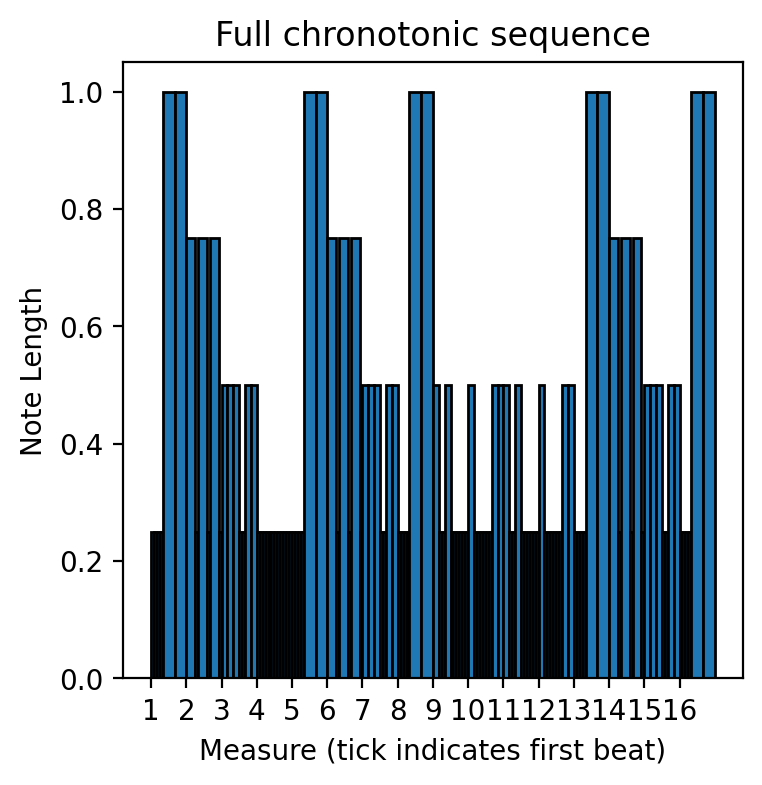

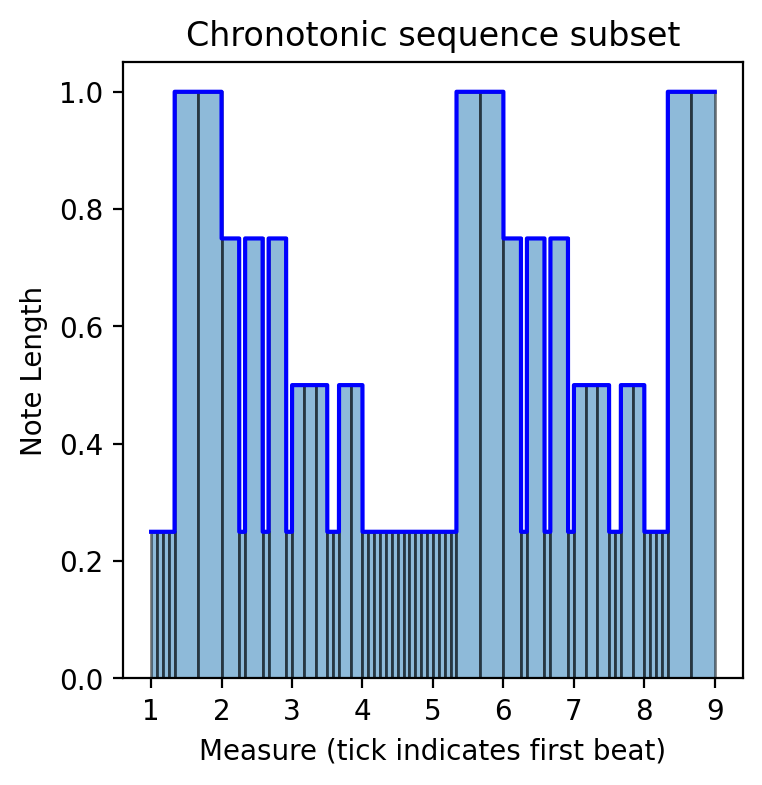

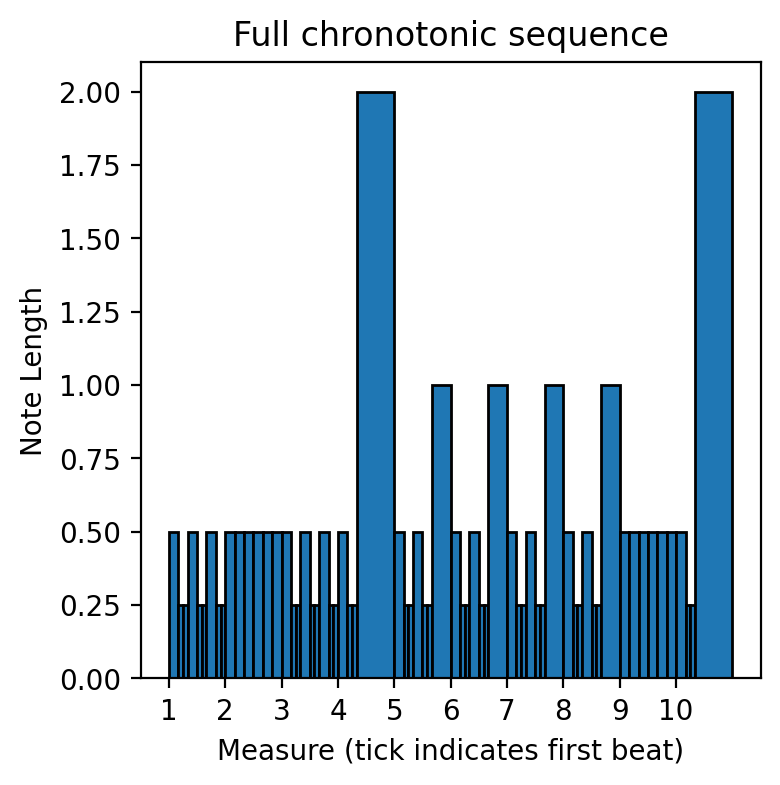

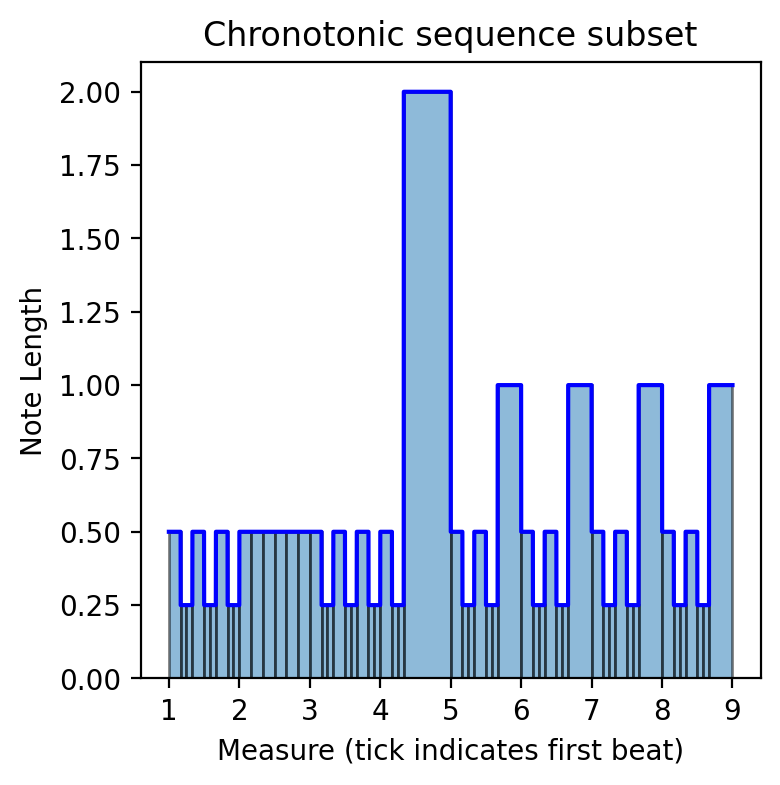

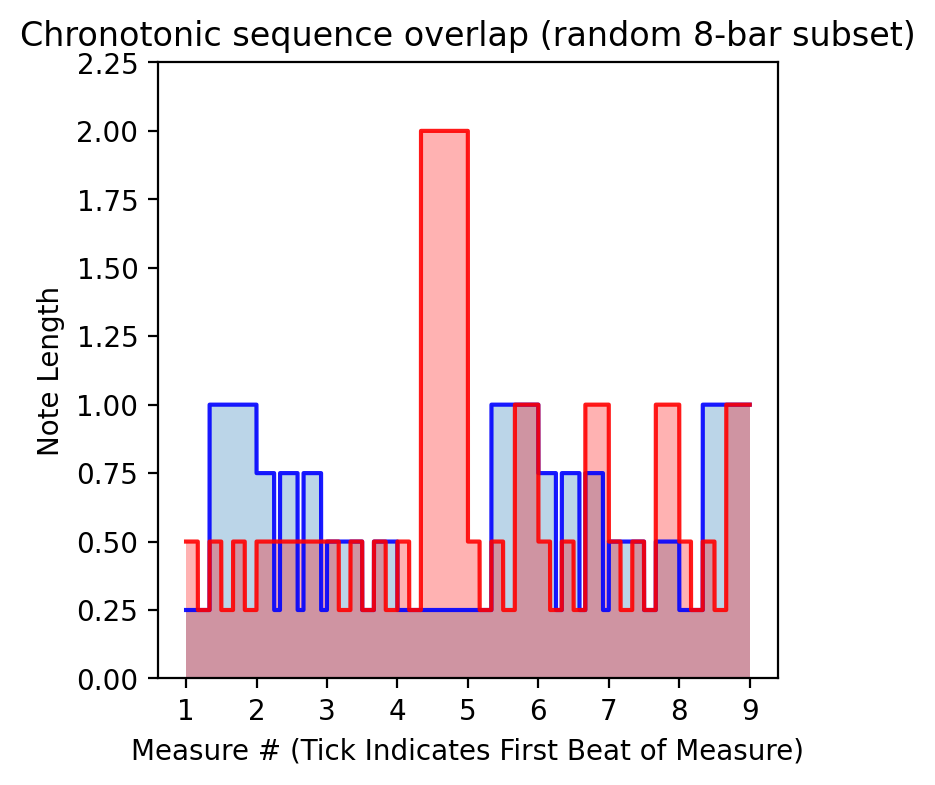

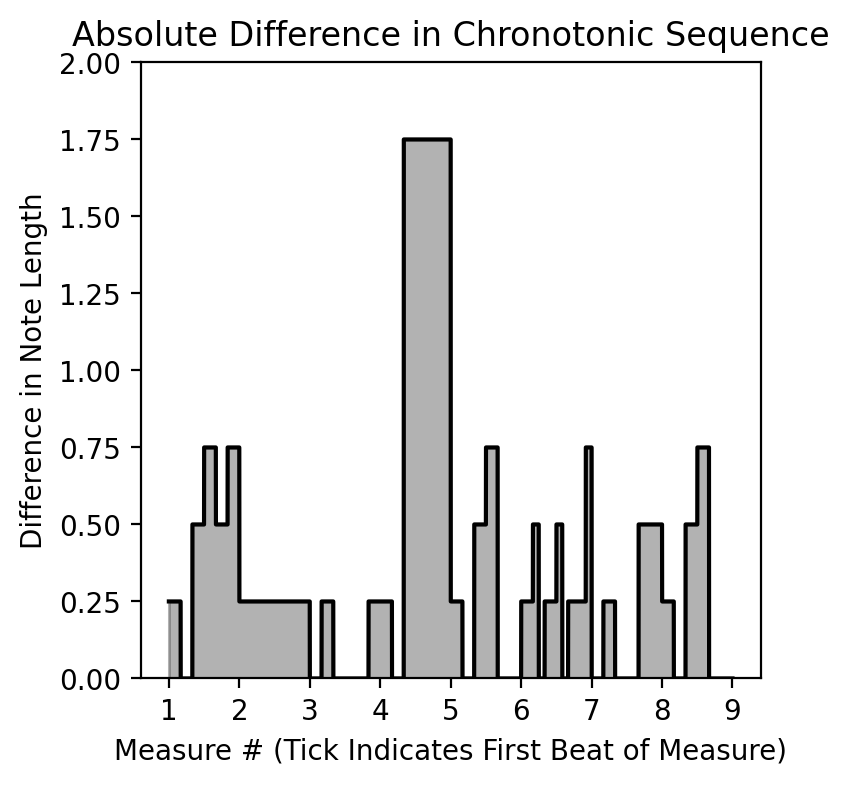

8.997599759975998

In [ ]:
# Now, a function that passes in a score name to create the above graphs
# chronotonic_builder(slangpolska_scores['_Polonäs_Mollo_sexdregasamlingen_del_3_nr_48_628b4c.xml'], show_graphs=True)
chronotonic_comparison(slangpolska_scores['Pollonesse_183254_460e7c.xml'], slangpolska_scores['_Polonäs_Mollo_sexdregasamlingen_del_3_nr_48_628b4c.xml'], subset_start = 1, show_graphs=True)

Distance Formula Sense Checks

In [ ]:
# Sense checks
# first must be 0
# second and third might differ without subset_start argument, that's due to randomness in 8 bars selected for comparison.
print(chronotonic_comparison(slangpolska_scores['Pollonesse_183254_460e7c.xml'], slangpolska_scores['Pollonesse_183254_460e7c.xml'],show_graphs=False))
print(chronotonic_comparison(slangpolska_scores['Pollonesse_183254_460e7c.xml'], slangpolska_scores['_Polonäs_Mollo_sexdregasamlingen_del_3_nr_48_628b4c.xml'], subset_start = 3, show_graphs=False))
print(chronotonic_comparison(slangpolska_scores['_Polonäs_Mollo_sexdregasamlingen_del_3_nr_48_628b4c.xml'], slangpolska_scores['Pollonesse_183254_460e7c.xml'], subset_start = 3, show_graphs=False))

0.0
10.625862586258627
10.625862586258627


Example Distance Formula for Writeup

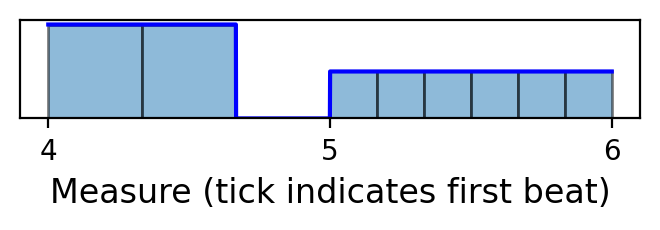

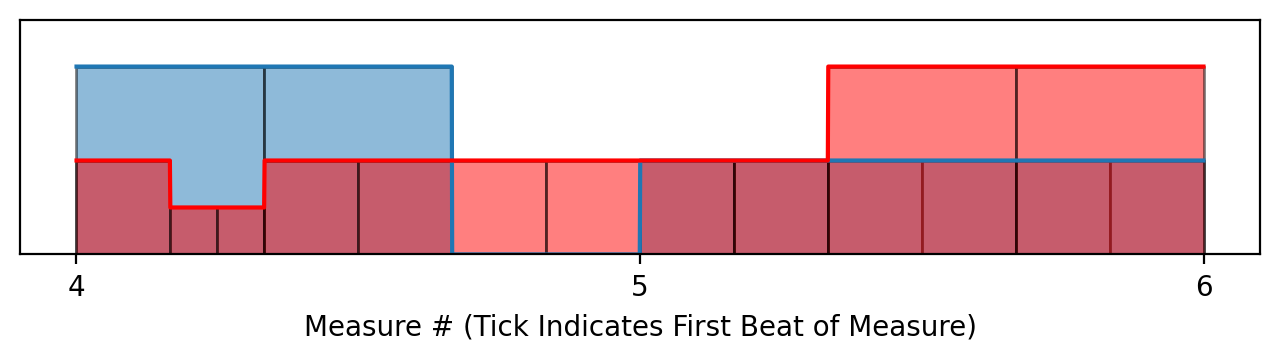

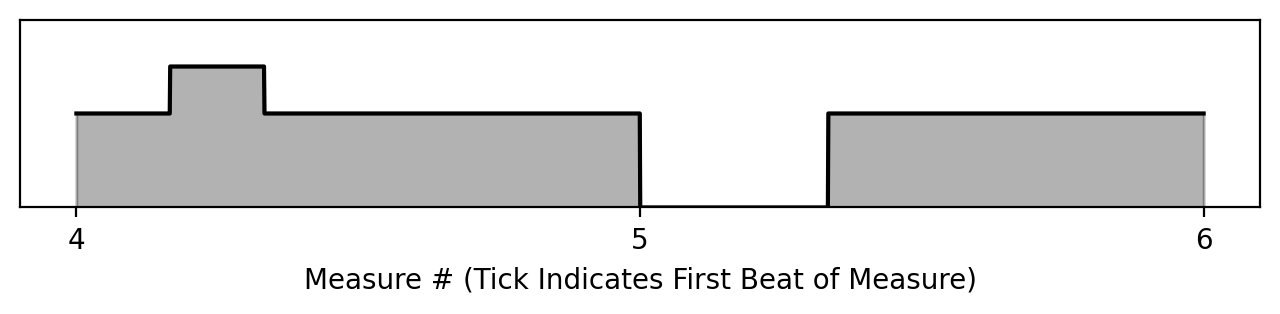

In [ ]:
# Example for paper - three bars of Dahl_polska_efter_Ola_Olsson_bf94a6.xml

chrono1, xvals1, yvals1, xticks1, xlabs1 = chronotonic_builder(slangpolska_scores['Dahl_polska_efter_Ola_Olsson_bf94a6.xml'], subset_start = 1, show_graphs=False)
#chrono_sequence
fig, ax = plt.subplots()
xvals_6bars = chrono1['onsets'][chrono1['onsets'] < 16]
yvals_6bars = chrono1['heights'][chrono1['onsets'] < 16]
binw_6bars = chrono1['bin_widths'][chrono1['onsets'] < 16]
xvals_3bars = xvals_6bars.loc[xvals_6bars.loc[lambda x : x >= 10].index.values.tolist()]
yvals_3bars = yvals_6bars.loc[xvals_6bars.loc[lambda x : x >= 10].index.values.tolist()]
binw_3bars = binw_6bars.loc[xvals_6bars.loc[lambda x : x >= 10].index.values.tolist()]

bar_plot = ax.bar(xvals_3bars, yvals_3bars, width=binw_3bars, align='edge', edgecolor='black', alpha = .5) # width=bin_width
ax.set_xlabel("Measure (tick indicates first beat)", fontsize=12)
plt.xticks(xticks1[3:6], xlabs1[3:6], fontsize=10)
xvals = np.array(xvals1)
tmp_indices = np.where(np.logical_and(xvals > 10,xvals < 16), True, False)
plt.plot(xvals[tmp_indices], yvals1[tmp_indices], 'blue')
ax.set_aspect('equal')
plt.rcParams['figure.figsize'] = [8,8]
ax.get_yaxis().set_visible(False)
plt.show()

chrono2, xvals2, yvals2, xticks2, xlabs2 = chronotonic_builder(slangpolska_scores['_1814_698087.xml'], subset_start = 1, show_graphs=False)

maxyvals = max(yvals1)
if maxyvals < max(yvals2):
    maxyvals = max(yvals2)
linspaced_subsets = pd.DataFrame(list(zip(xvals1, yvals1, xvals2, yvals2)), columns=['score1_xvals', 'score1_yvals', 'score2_xvals', 'score2_yvals'])
linspaced_subsets['x_diff'] = linspaced_subsets['score1_xvals'] - linspaced_subsets['score2_xvals']
linspaced_subsets['y_diff'] = abs(linspaced_subsets['score1_yvals'] - linspaced_subsets['score2_yvals'])

fig, ax = plt.subplots()

xvals2_6bars = chrono2['onsets'][chrono2['onsets'] < 16]
yvals2_6bars = chrono2['heights'][chrono2['onsets'] < 16]
binw2_6bars = chrono2['bin_widths'][chrono2['onsets'] < 16]
xvals2_3bars = xvals2_6bars.loc[xvals2_6bars.loc[lambda x : x >= 10].index.values.tolist()]
yvals2_3bars = yvals2_6bars.loc[xvals2_6bars.loc[lambda x : x >= 10].index.values.tolist()]
binw2_3bars = binw2_6bars.loc[xvals2_6bars.loc[lambda x : x >= 10].index.values.tolist()]

bar_plot = ax.bar(xvals_3bars, yvals_3bars, width=binw_3bars, align='edge', edgecolor='black', alpha = .5) # edgecolor='black'
bar_plot = ax.bar(xvals2_3bars, yvals2_3bars, width=binw2_3bars, align='edge', color='red', edgecolor='black', alpha = .5) # edgecolor='black'
#ax.set_ylabel("Note Length")
#ax.set_xlabel("Measure # (Tick Indicates First Beat of Measure)")
#plt.title("Chronotonic sequence overlap (random 8-bar subset)")
plt.plot(xvals[tmp_indices], yvals1[tmp_indices], alpha = 1)
plt.plot(xvals[tmp_indices], yvals2[tmp_indices], 'red', alpha = 1)
plt.xticks(xticks1[3:6], xlabs1[3:6])
plt.ylim([0,1.25])
ax.set_aspect('equal')
plt.rcParams['figure.figsize'] = [8,8]
ax.get_yaxis().set_visible(False)
plt.xlabel('Measure # (Tick Indicates First Beat of Measure)')
plt.show()

fig, ax = plt.subplots()
tmp_indices = np.where(np.logical_and(linspaced_subsets['score1_xvals'] > 10,linspaced_subsets['score1_xvals'] < 16), True, False)
linsubs_xvals_3bars = linspaced_subsets['score1_xvals'].loc[tmp_indices]
linsubs_yvals_3bars = linspaced_subsets['y_diff'].loc[tmp_indices]

plt.plot(linsubs_xvals_3bars,linsubs_yvals_3bars,color='black')
plt.xticks(xticks1[3:6], xlabs1[3:6])
plt.ylim([0,1])
plt.fill_between(linsubs_xvals_3bars, linsubs_yvals_3bars, color='black', alpha = .3)
ax.set_aspect('equal')
plt.rcParams['figure.figsize'] = [4,4]
ax.get_yaxis().set_visible(False)
plt.xlabel('Measure # (Tick Indicates First Beat of Measure)')
plt.show(5)


In [ ]:
# Output notes for generative model
score_name = []
measure_number = []
beat = []
duration = []
event_type = []
for i,score in enumerate(slangpolska_scores):
    curr_score = slangpolska_scores[score]
    for event in curr_score.recurse().notesAndRests:
        score_name.append(score)
        measure_number.append(event.measureNumber)
        beat.append(event.beat)
        duration.append(event.duration.quarterLength)
        event_type.append(str(type(event)))
dnotes = pd.DataFrame(list(zip(score_name, measure_number, beat, duration, event_type)),
               columns =['Score Name','Measure','Onset','Duration','Event'])
dnotes.to_pickle("./dnotes.pkl")

Generation

In [132]:
# Random

import random

def random_sequence():
    
    unique_notes = ['0.5', '0.75', '1.5', '0.125', '0.875', '0.0', '2.0', '0.375', '0.25', '1/12',  '1/6', '1/3', '3.0', '1.0'] #4
    
    def convert_to_float(frac_str):
        try:
            return float(frac_str)
        except ValueError:
            num, denom = frac_str.split('/')
            try:
                leading, num = num.split(' ')
                whole = float(leading)
            except ValueError:
                whole = 0
            frac = float(num) / float(denom)
            return whole - frac if whole < 0 else whole + frac
        
    durations = [convert_to_float(n) for n in unique_notes]
    durations.remove(0)
    durations
    
    limit = 8 * 3
    def select_numbers(nums, target):
        # initialize the current sum and selected numbers list
        current_sum = 0
        selected = []

        # randomly select numbers until their sum equals the target
        while current_sum != target:
            # randomly select a number from the input array
            num = random.choice(nums)

            if current_sum + min(nums) > target:
                num = target - current_sum

            # if adding the selected number would exceed the target, skip it
            elif current_sum + num > target:
                continue



            # add the selected number to the current sum and selected list
            current_sum += num
            selected.append(num)
        return selected
    
    def generate_sequence(nums, target):
        durations = select_numbers(nums, target)
        sequence = list()
        for d in durations:
            if random.randrange(2):
                sequence.append(str(d))
            else:
                sequence.append(d)
        return sequence
    
    return generate_sequence(durations, limit)

In [133]:
random_set_list_fmt = []
for run in range(50):
    if run%10 == 0:
        print(run)
    random_tmp = random_sequence()
    random_set_list_fmt.append(random_tmp)

# Music21 doesn't like being saved as pkl and reloaded. Save lists instead.
with open('randoms.pkl', 'wb') as f:
    pickle.dump(random_set_list_fmt, f)

0
10
20
30
40


In [ ]:
# Bigrams - model def

from collections import Counter
from itertools import chain
import random

def get_note(_quarterLength, _beat):
    return {
        "duration": _quarterLength,
        "beat": _beat
    }
def bigrams_start_notes():
    return bigrams_start_notes
    
def first_measure_note(): 
    return {
        "duration": "start_tag",
        "beat": -1
    }
    
def last_measure_note():
    return {
        "duration": "end_tag",
        "beat": -1
    }

def init_model():
    # bigrams for the durations and beats
    durations = []
    # gather bigram statistics type:
    # iterate over all the corpus, measure by measure and fill the array of the notes
    bigrams_notes = [] # a list of lists of tuples [[("2", "b")], [("1", "a")]] -> return Counter(chain(*self.tupel_word_dict))
    bigrams_start_notes = []
    for piece in slangpolska_scores:
        sample_score = slangpolska_scores[piece]
        curr_measure = 0
        first_measure_note = {
            "duration": "start_tag",
            "beat": -1
        }
        last_measure_note = {
            "duration": "end_tag",
            "beat": -1
        }
        last_note = first_measure_note
        measure = []
        for i in sample_score.recurse().notes:
            if i.measureNumber != curr_measure:
                if last_note["duration"] != "start_tag":
                    bigrams_notes.append((last_note, last_measure_note))
                    last_note = first_measure_note
                    curr_measure = i.measureNumber
            # makes sure we are not in type Chord
            if hasattr(i, "name"):
                bigrams_notes.append((last_note, get_note(i.duration.quarterLength, i.beat)))
                if curr_measure > 0:
                    if bigrams_notes[-1][0]["duration"] == "start_tag":
                        bigrams_start_notes.append((bigrams_notes[-2][0], bigrams_notes[-1][1])) # adding the last note in the last measure and the first measure in the new measure
            else:
                continue
            last_note = get_note(i.duration.quarterLength, i.beat)
            durations.append(last_note["duration"])
        bigrams_notes.append((last_note, last_measure_note))

    durations = list(set(durations))
    bigrams_durations = durations # kaede add
    print(bigrams_notes[:100])

    return bigrams_notes, bigrams_durations, bigrams_start_notes 

bigrams_notes, bigrams_durations, bigrams_start_notes = init_model()


[({'duration': 'start_tag', 'beat': -1}, {'duration': 0.5, 'beat': 1.0}), ({'duration': 0.5, 'beat': 1.0}, {'duration': 'end_tag', 'beat': -1}), ({'duration': 'start_tag', 'beat': -1}, {'duration': 0.25, 'beat': 1.5}), ({'duration': 0.25, 'beat': 1.5}, {'duration': 0.25, 'beat': 1.75}), ({'duration': 0.25, 'beat': 1.75}, {'duration': 0.5, 'beat': 2.0}), ({'duration': 0.5, 'beat': 2.0}, {'duration': 0.25, 'beat': 2.5}), ({'duration': 0.25, 'beat': 2.5}, {'duration': 0.25, 'beat': 2.75}), ({'duration': 0.25, 'beat': 2.75}, {'duration': 0.5, 'beat': 3.0}), ({'duration': 0.5, 'beat': 3.0}, {'duration': 0.5, 'beat': 3.5}), ({'duration': 0.5, 'beat': 3.5}, {'duration': 'end_tag', 'beat': -1}), ({'duration': 'start_tag', 'beat': -1}, {'duration': 0.75, 'beat': 1.0}), ({'duration': 0.75, 'beat': 1.0}, {'duration': 0.25, 'beat': 1.75}), ({'duration': 0.25, 'beat': 1.75}, {'duration': 0.25, 'beat': 2.0}), ({'duration': 0.25, 'beat': 2.0}, {'duration': 0.25, 'beat': 2.25}), ({'duration': 0.25, 'b

In [ ]:
def generate_measures(bigrams_notes, bigrams_durations, bigrams_start_notes):
    # Generate a sequence within a squence of 8 measures, each measure created with a context of having a start and end note. Building the measure from start to end within this given random context
    measures = []

    #print(bigrams_start_notes[:10]) # kaede comment out
    #print(bigrams_notes[:10]) # kaede comment out
    # do the range till 6
    for i in range(8):
        measure = []
        total_duration = 0
        
        if measures:
            previous_measure_last_note = measures[-1][-1]
            # print("last measure: ", previous_measure_last_note) # kaede comment out
            bigrams_candidates_start_note = [bigram[1] for bigram in bigrams_start_notes if bigram[0] == previous_measure_last_note]
        # get all possible relevant candidates based on the last note plus that are in duration candidates
        else:
            bigrams_candidates_start_note = [bigram[1] for bigram in bigrams_notes if bigram[0] == first_measure_note()]
            # print(first_measure_note()) # kaede comment out
        # add first note
        first_note = random.choice(bigrams_candidates_start_note)
        measure.append(first_note)
        total_duration = first_note["duration"]
        
        # add last note if possible
        possible_durations = list(filter(lambda x: x <= 3 - total_duration, bigrams_durations)) # kaede add bigrams_ to durations
        bigrams_candidates_end_note = [bigram[0] for bigram in bigrams_notes if bigram[1] == last_measure_note() and bigram[0]["duration"] in possible_durations]
        # in case the first note is a full measure
        if (not bigrams_candidates_end_note):
            measure.append(last_measure_note())
            break
        last_note = random.choice(bigrams_candidates_end_note)
        measure.append(last_note)
        total_duration += last_note["duration"]

        while (total_duration < 3):
            previous_note = measure[-2] # last appended note
            duration_candidates = list(filter(lambda x: x <= 3 - total_duration, bigrams_durations)) # kaede add bigrams_ to durations
            if not duration_candidates: # in case the fraction messed up the summation
                break
            # get all possible relevant candidates based on the last note plus that are in duration candidates
            bigrams_candidates = [bigram[1] for bigram in bigrams_notes if bigram[0] == previous_note and bigram[1]["duration"] in duration_candidates]
            bigrams_candidates = bigrams_candidates + [bigram[0] for bigram in bigrams_notes if bigram[1] == last_note and bigram[0]["duration"] == 3 - total_duration] # get all gap fillers
            # random weighted pick
            next_note = random.choice(bigrams_candidates)
            total_duration += next_note["duration"]
            measure.insert(len(measure) - 1, next_note) # inserts it on the position before the last one
        measures.append(measure)

    # for m in measures: # kaede comment out
    #    print(m)
    
    return measures

In [ ]:
bigram_set = []
for run in range(50):
    if run%10 == 0:
        print(run)
    bigram_tmp = generate_measures(bigrams_notes, bigrams_durations, bigrams_start_notes)
    bigram_set.append(bigram_tmp)
# took this out of loop above bc it was causing trouble...
# also, lord only know how inefficient this set of loops is.


0
10
20
30
40


KeyboardInterrupt: 

In [ ]:
bigram_set_list_fmt = []
for i, generated_score in enumerate(bigram_set):
    tmp = []
    for j, measure in enumerate(generated_score):
        for k, event in enumerate(measure):
            tmp.append(bigram_set[i][j][k]['duration'])
    bigram_set_list_fmt.append(tmp)

# Music21 doesn't like being saved as pkl and reloaded. Save lists instead.
with open('bigrams.pkl', 'wb') as f:
    pickle.dump(bigram_set_list_fmt, f)

Adapted from Score Generator from Tutorial Assignment 1.ipynb on Moodle (had to add god awful measure structure)

In [134]:

from music21 import note
import math
import pickle 
from fractions import Fraction
UNIT = 1/4 #We express duration as fractions of a quarter note. Use UNIT = 1 to express durations as fractions of whole-notes
def percussion_hit(duration, pitch = "C4"):
    #Create Note object for percussion hits (default pitch is C4)
    return note.Note(pitch, quarterLength = duration*(4*UNIT))

def create_percussion(time_sig = None):
    """ Creates a container with or without time signature to which
    events can be appended.

    Parameters
    ----------
    time_sig : str, optional
        By default, no time signature is specified, so that a single measure of unspecified capacity is generated.
        If you do specify a time signature a stream with the given time signature is created instead.

    Returns
    -------
    music21.stream.Stream
        If time_sig is None, the return value is a Measure which is a subclass of Stream.
    """
    if time_sig == None:
        drumPart = stream.Measure()
    else:
        drumPart = stream.Stream()
        drumPart.timeSignature = meter.TimeSignature(time_sig)
    
    drumPart.insert(1, instrument.Woodblock()) #assign woosblock timbre
    return drumPart

def append_event(duration, meas_num, old_rhythm, rest = False, pitch = 'C4'):
    """ Appends a rest or percussion_hit of the given duration to an existing stream.

    Parameters
    ----------
    duration : float or Fraction
        Duration of the new event.
    stream_object : music21.stream.Stream
        Stream object to which append the new event to.
    rest : bool, optional
        By default, the appended event has the pitch ``pitch``.
        Pass True to append a rest instead.
    pitch : str, optional
        Pitch of the appended event, matters only for display. Disregarded if ``rest`` is True.

    Returns
    -------
    None
    """
    new_rhythm = old_rhythm
    if rest:
        new_rhythm.getElementsByClass(stream.Measure)[-1].append(note.Rest(quarterLength = duration*(4*UNIT)))
    else:
        new_rhythm.getElementsByClass(stream.Measure)[-1].append(percussion_hit(duration, pitch))
    return new_rhythm

def rhythm_from_sequence(durations, time_sig = None, pitch = 'C4', rhythm=None):
    """ Generate rhythmic stream from a list of durations. Rests are indicated by specifying a duration as a string.

    Parameters
    ----------
    durations : list of {float, Fraction, str}
        Sequence of durations. Floats or Fractions passed as strings are interpreted as rests.
    time_sig : str, optional
        By default, no time signature is specified, so that a single measure of unspecified capacity is generated.
        If you do specify a time signature a stream with the given time signature is created instead.
    pitch : str, optional
        Matters only for display.
    rhythm : music21.stream.Stream, optional
        If you want to append the rhythm to an existing Stream, pass this Stream. Otherwise a new one will be created.

    Returns
    -------
    music21.stream.Stream
        The rhythm reflecting the given list of durations.
    """
    if rhythm is None:
        # pass an existing stream 'rhythm' to append the durations, otherwise a new one will be created
        rhythm = create_percussion(time_sig = time_sig)
        rhythm.insert(1,stream.Measure(number=1))
        meas = rhythm.getElementsByClass(stream.Measure)[-1].measureNumber
        running_onset = 1 - Fraction(durations[0])
    for dur in durations:
        running_onset = running_onset + Fraction(dur)
        is_rest = False
        if dur != 0:
            if isinstance(dur, str):
                #if duration is given as a string, interpret and rest and turn string into a numerical value
                is_rest = True
                dur = Fraction(dur)
            running_measure = (math.floor(((running_onset - 1) / 3)) + 1)
            if running_measure > meas:
                rhythm.insert((running_measure-1)*3+1,stream.Measure(number=meas + 1))
            meas = running_measure
            rhythm = append_event(dur, meas, rhythm, rest = is_rest, pitch = pitch)
    return rhythm


In [135]:
with open('randoms.pkl', 'rb') as f:
    random_set_list_fmt = pickle.load(f)

generated_from_random = []
for i,generated_score in enumerate(random_set_list_fmt):
    rhythm = rhythm_from_sequence(random_set_list_fmt[i], time_sig='3/4')
    #rhythm.show()
    generated_from_random.append(rhythm)

with open('bigrams.pkl', 'rb') as f:
    bigram_set_list_fmt = pickle.load(f)

generated_from_bigrams = []
for i,generated_score in enumerate(bigram_set_list_fmt):
    rhythm = rhythm_from_sequence(bigram_set_list_fmt[i], time_sig='3/4')
    #rhythm.show()
    generated_from_bigrams.append(rhythm)

Compare Corpuses

In [ ]:
def chronotonic_sequence_create_and_store(stream_base_score, stream_name):
    onsets = []
    heights = []
    final_measure = stream_base_score.recurse().notesAndRests[-1].measureNumber
    for n_or_r in stream_base_score.recurse().notesAndRests:
        onsets.append(n_or_r.beat + (3 * (n_or_r.measureNumber-1)))
        if isinstance(n_or_r, (music21.note.Note,music21.chord.Chord)):
            heights.append(n_or_r.duration.quarterLength)
        else:
            heights.append(float(0))
    x_for_interp = []
    y_for_interp = []
    for i,x in enumerate(onsets):
        if i != 0:
            x_for_interp.append(float(onsets[i-1]))
            y_for_interp.append(float(heights[i-1]))
            x_for_interp.append(float(onsets[i]-.00000000001))
            y_for_interp.append(float(heights[i-1]))
    x_for_interp.append(float(onsets[-1]))
    y_for_interp.append(float(heights[-1]))
    xvals = np.linspace(1, final_measure, final_measure * 1250)
    yinterp = np.interp(xvals, x_for_interp, y_for_interp)

In [ ]:
chronotonic_sequence_create_and_store(slangpolska_scores['_1814_698087.xml'], 'test')

[1.0, 1.49999999999, 1.5, 1.99999999999, 2.0, 2.99999999999, 3.0, 3.99999999999, 4.0, 4.49999999999, 4.5, 4.99999999999, 5.0, 5.99999999999, 6.0, 6.99999999999, 7.0, 7.74999999999, 7.75, 7.99999999999, 8.0, 8.49999999999, 8.5, 8.99999999999, 9.0, 9.49999999999, 9.5, 9.99999999999, 10.0, 10.49999999999, 10.5, 10.74999999999, 10.75, 10.99999999999, 11.0, 11.49999999999, 11.5, 11.99999999999, 12.0, 12.49999999999, 12.5, 12.99999999999, 13.0, 13.49999999999, 13.5, 13.99999999999, 14.0, 14.99999999999, 15.0, 15.99999999999, 16.0, 16.49999999999, 16.5, 16.99999999999, 17.0, 17.99999999999, 18.0, 18.99999999999, 19.0, 19.74999999999, 19.75, 19.99999999999, 20.0, 20.49999999999, 20.5, 20.99999999999, 21.0, 21.49999999999, 21.5, 21.99999999999, 22.0, 22.49999999999, 22.5, 22.99999999999, 23.0, 24.99999999999, 25.0, 25.49999999999, 25.5, 25.99999999999, 26.0, 26.49999999999, 26.5, 26.99999999999, 27.0, 27.49999999999, 27.5, 27.99999999999, 28.0, 28.49999999999, 28.5, 28.99999999999, 29.0, 29.499

In [146]:
for i,score in enumerate(generated_from_random):
    if generated_from_random[i].recurse().notesAndRests[-1].measureNumber < 8:
        print(i)
generated_from_random[8].recurse().notesAndRests[-1].measureNumber
generated_from_random[8].show('text')
random_set_list_fmt[8]
generated_from_bigrams[1].show('text')
bigram_set_list_fmt[1]

{0.0} <music21.meter.TimeSignature 3/4>
{1.0} <music21.instrument.Woodblock 'Woodblock'>
{1.0} <music21.stream.Measure 1 offset=1.0>
    {0.0} <music21.note.Rest dotted-half>
    {3.0} <music21.note.Note C>
    {4.0} <music21.note.Note C>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.note.Note C>
    {3.0} <music21.note.Note C>
    {3.0833} <music21.note.Rest 0.875ql>
    {3.9583} <music21.note.Note C>
    {4.0833} <music21.note.Rest 1/6ql>
{7.0} <music21.stream.Measure 3 offset=7.0>
    {0.0} <music21.note.Rest dotted-16th>
    {0.375} <music21.note.Rest dotted-eighth>
    {1.125} <music21.note.Rest dotted-eighth>
    {1.875} <music21.note.Note C>
{10.0} <music21.stream.Measure 4 offset=10.0>
    {0.0} <music21.note.Note C>
{13.0} <music21.stream.Measure 5 offset=13.0>
    {0.0} <music21.note.Note C>
    {3.0} <music21.note.Rest eighth>
{16.0} <music21.stream.Measure 6 offset=16.0>
    {0.0} <music21.note.Note C>
    {0.1667} <music21.note.Note C>
    {0.25} <music21.

[0.5,
 0.5,
 0.5,
 0.5,
 1.0,
 0.5,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 1.0,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 1.0,
 0.5,
 0.5,
 0.5,
 0.5,
 0.75,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.5,
 0.25,
 0.25,
 0.5,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.5,
 0.5,
 0.5,
 0.5,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0]

In [137]:
orig_to_orig_distances = {}
orig_to_rand_distances = {}
orig_to_bigr_distances = {}

# Throw error before loop so except: below doesn't arbitrarily catch fatal error
# generated_from_random[0]
generated_from_bigrams[0]
chronotonic_comparison(slangpolska_scores['_1814_698087.xml'],slangpolska_scores['_1814_698087.xml'])
chronotonic_builder(slangpolska_scores['_1814_698087.xml'])

import tqdm
for score in tqdm.tqdm(slangpolska_scores.keys()):

    orig_to_orig_distances[score] = {}
    orig_to_rand_distances[score] = {}
    orig_to_bigr_distances[score] = {}

    # orig to orig
    #for oth_orig_score in slangpolska_scores.keys():
    #    orig_to_orig_distances[score][oth_orig_score] = chronotonic_comparison(slangpolska_scores[score],slangpolska_scores[oth_orig_score])

    # orig to random
    for random_index, rand_score in enumerate(generated_from_random):
        orig_to_rand_distances[score][rand_score] = chronotonic_comparison(slangpolska_scores[score],stream.Score(generated_from_random[random_index]))
    # orig to bigram
    for bigram_index,gen_score in enumerate(generated_from_bigrams):
        orig_to_bigr_distances[score][oth_orig_score] = chronotonic_comparison(slangpolska_scores[score],stream.Score(generated_from_bigrams[bigram_index]))

with open(' orig_to_orig_distances.pkl', 'wb') as f:
    pickle.dump( orig_to_orig_distances, f)
with open('orig_to_rand_distances.pkl', 'wb') as f:
    pickle.dump(orig_to_rand_distances, f)
with open('orig_to_bigr_distances.pkl', 'wb') as f:
    pickle.dump(orig_to_bigr_distances, f)

    

  0%|          | 0/576 [00:00<?, ?it/s]

ONE OF THE SCORES IS TOO SHORT
ONE OF THE SCORES IS TOO SHORT
ONE OF THE SCORES IS TOO SHORT


  0%|          | 1/576 [00:03<34:53,  3.64s/it]

ONE OF THE SCORES IS TOO SHORT
ONE OF THE SCORES IS TOO SHORT
ONE OF THE SCORES IS TOO SHORT


  0%|          | 1/576 [00:06<1:02:06,  6.48s/it]


KeyboardInterrupt: 

In [ ]:
orig_to_orig_distances
orig_to_bigr_distances


In [ ]:
# Perform statistical test on resulting distances

import matplotlib.pyplot as plt
import statistics
from math import sqrt
import scipy.stats as st

random_diff = [35, 40, 25, 33, 44, 56, 72, 11, 40]
not_random_diff = [12, 3, 24, 11, 30, 10, 9, 14, 20, 12, 13]

def plot_confidence_interval(x, values, color='#2187bb', horizontal_line_width=0.25):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = st.t.interval(alpha = 0.95, df=len(values)-1, loc=np.mean(values), scale=st.sem(values))

    left = x - horizontal_line_width / 2
    top = max(confidence_interval)
    right = x + horizontal_line_width / 2
    bottom = min(confidence_interval)
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')

    return mean, confidence_interval

